In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


<Axes: xlabel='Gender', ylabel='count'>

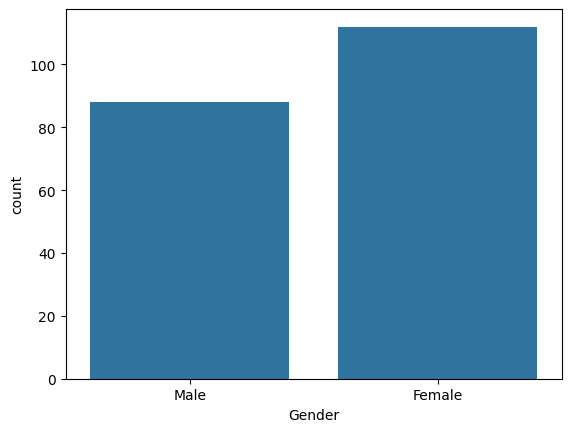

In [8]:
sns.countplot(x='Gender',data= df)

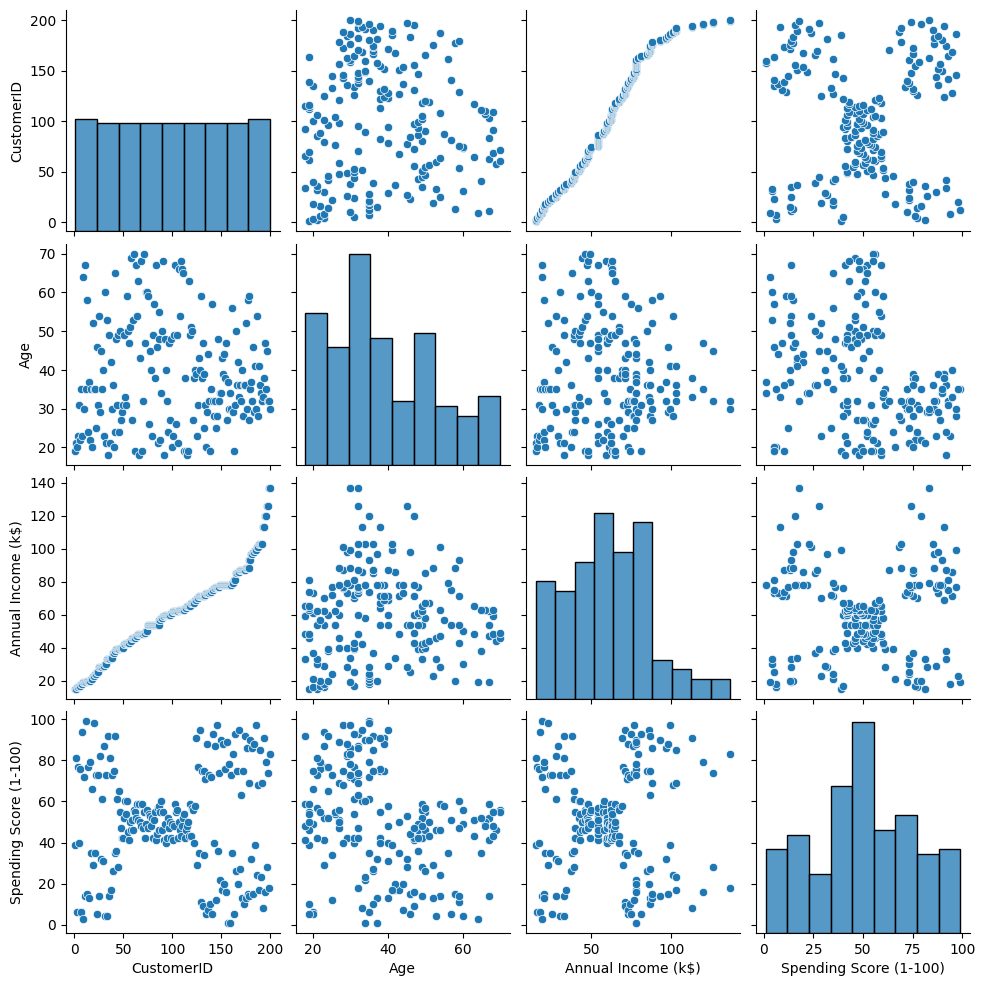

In [9]:
sns.pairplot(data= df)

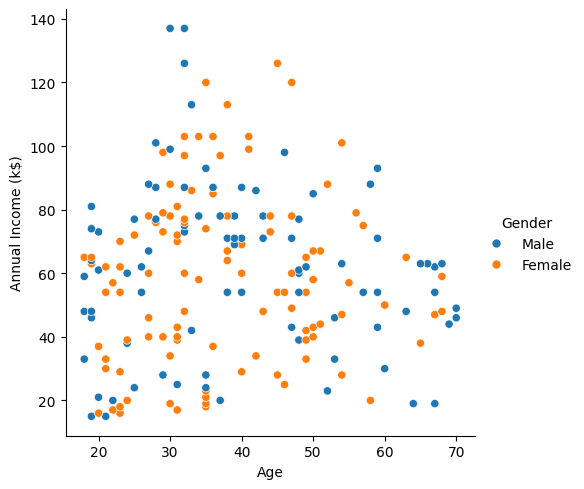

In [10]:
sns.relplot(x="Age", y="Annual Income (k$)", hue="Gender", data=df)

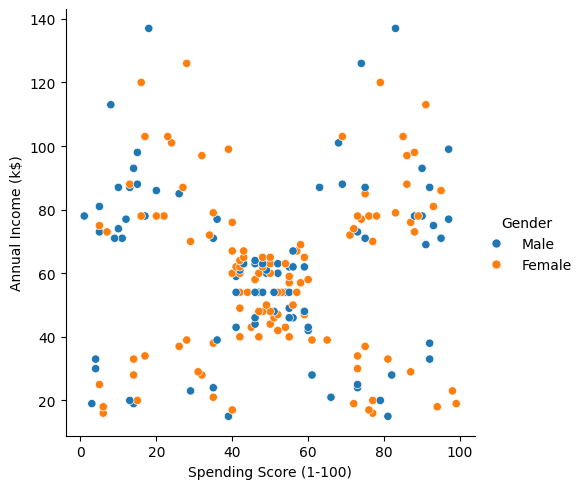

In [11]:
sns.relplot(x="Spending Score (1-100)", y="Annual Income (k$)", hue="Gender", data=df)

In [12]:
df_1 = df[['Age','Annual Income (k$)']]

In [13]:
from sklearn.cluster import KMeans

In [14]:
kmeans = KMeans(n_clusters=3, max_iter=5000)

In [15]:
kmeans.fit(df_1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(max_iter=5000, n_clusters=3)

In [16]:
kmeans.cluster_centers_

array([[34.34782609, 82.82608696],
       [55.03448276, 50.34482759],
       [28.36      , 31.44      ]])

In [17]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [18]:
idx0=np.where(kmeans.labels_==0)
idx1=np.where(kmeans.labels_==1)
idx2=np.where(kmeans.labels_==2)
print(len(idx0[0]), len(idx1[0]), len(idx2[0]))

92 58 50


In [19]:
c1 = df_1.loc[idx0]
c2 = df_1.loc[idx1]
c3 = df_1.loc[idx2]

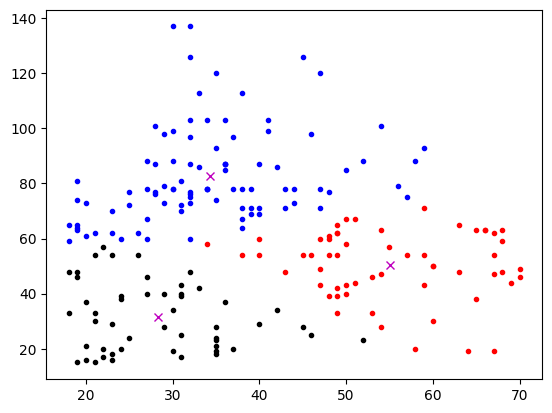

In [20]:
plt.plot(c1["Age"], c1["Annual Income (k$)"], "b.")
plt.plot(c2["Age"], c2["Annual Income (k$)"], "r.")
plt.plot(c3["Age"], c3["Annual Income (k$)"], "k.")

plt.plot(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], "mx", linewidth=10)
plt.plot(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1], "mx", linewidth=10)
plt.plot(kmeans.cluster_centers_[2][0], kmeans.cluster_centers_[2][1], "mx", linewidth=10)

In [21]:
kmeans.cluster_centers_[0]

array([34.34782609, 82.82608696])

(array([31., 19., 34., 29., 16., 26., 15., 10.,  6., 14.]),
 array([18. , 23.2, 28.4, 33.6, 38.8, 44. , 49.2, 54.4, 59.6, 64.8, 70. ]),
 <BarContainer object of 10 artists>)

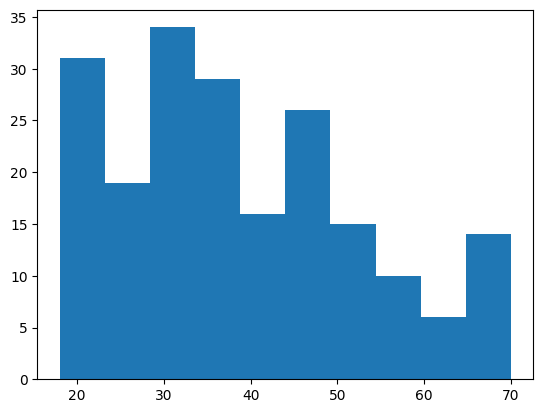

In [22]:
plt.hist(df_1['Age'])

(array([24., 22., 28., 38., 30., 36.,  8.,  6.,  4.,  4.]),
 array([ 15. ,  27.2,  39.4,  51.6,  63.8,  76. ,  88.2, 100.4, 112.6,
        124.8, 137. ]),
 <BarContainer object of 10 artists>)

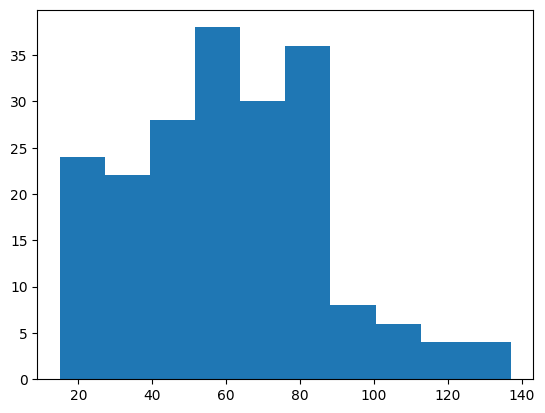

In [23]:
plt.hist(df_1["Annual Income (k$)"])

In [24]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_1)
    distortions.append(kmeanModel.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

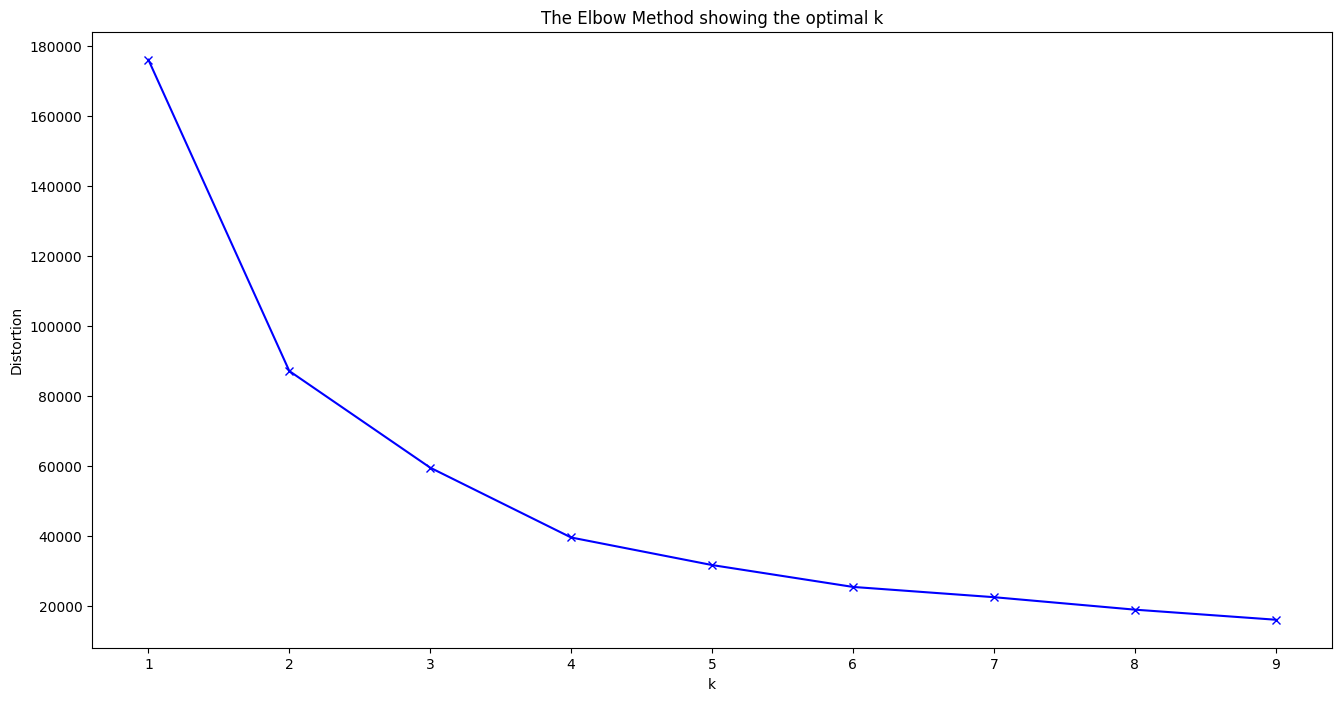

In [25]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
